In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
df_ROS = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_ROS.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [46]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df_ROS.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df_ROS['Survived']=df_ROS['Survived'].astype(object)
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [49]:
df_ROS = df_ROS.drop(columns = ['Cabin','Age'])

In [50]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.7+ KB


In [51]:
df_ROS = df_ROS.dropna()

In [52]:
df_ROS['Pclass'] = df_ROS['Pclass'].astype(object)

In [53]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 76.4+ KB


### 상관관계 확인
- 목표변수 : 'Survived'_분포: 불균형 (연속형: 정규화 확인, 범주형: 균형 확인) 
- 설명변수 : 
    - Pclass : 등급에 따른 생존률의 관계성이 높은 것으로 보여지고, 1등석의 생존률이 높은 것으로 보인다.
    - Sex : 성별에 따른 생존률의 관계성이 높은 것으로 보여지고 여성의 생존률이 높은 것으로 보인다.
    - Ticket : 생존률과의 관계성을 찾아보는 것에 유의미한 분석을 할 수 없는 것으로 보인다.
    - Fare : 높은 요금에 따른 생존률의 관계성이 높은 것으로 보여진다.
    - Embarked : 탑승 지역에 따른 생존률 과의 관계가 높은 것으로 보여지고 Cherbourg에서 탑승한 인원이 높은 생존률을 보인다.
    - SibSp : 형제자매간의 탑승은 생존률과의 상관관계가 낮은 것으로 보인다.
    - Parch : 부모자식간의 탑승은 생존률과의 상관관계가 높은 것으로 보인다.
- 분석 스토리 : 타이타닉 사고에서 높은 생존률을 가진 사람들은 높은 등급의 클래스를 구매하여 부모님과 같이 여행을 하는 것이 생존에 
    유리 한것으로 보여진다ㅏ.

In [54]:
df_ROS_list = df_ROS.describe().columns.to_list()
df_ROS_list

['PassengerId', 'SibSp', 'Parch', 'Fare']

<Axes: xlabel='Survived', ylabel='SibSp'>

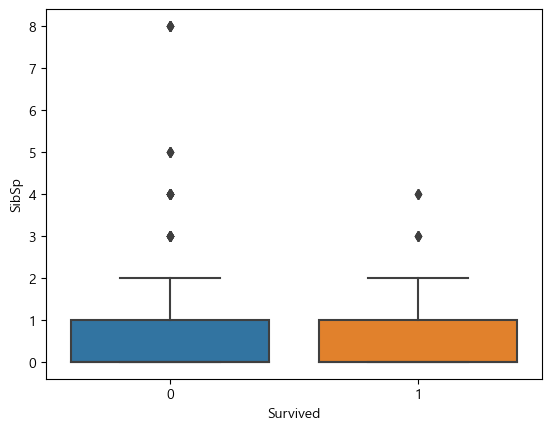

In [55]:
sns.boxplot(data=df_ROS, x='Survived', y='SibSp')

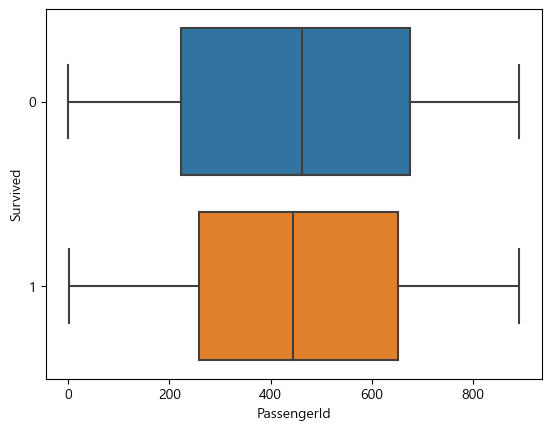

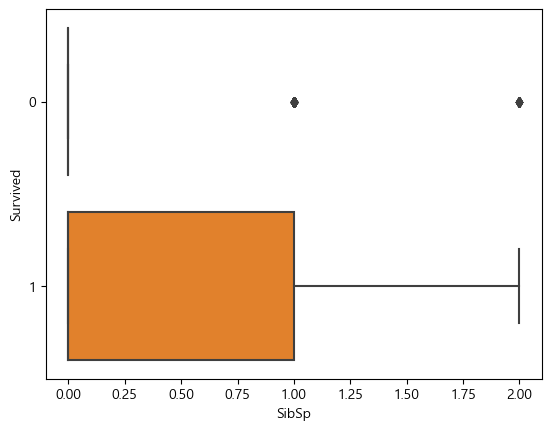

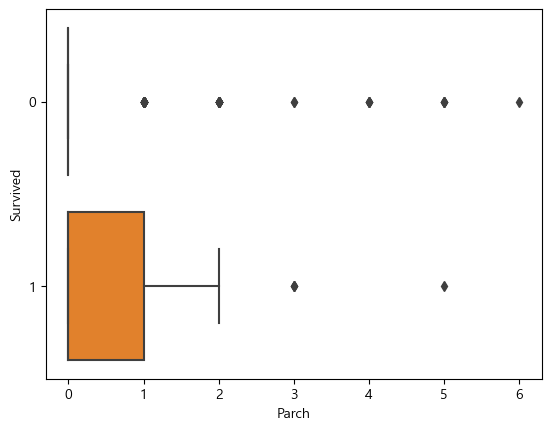

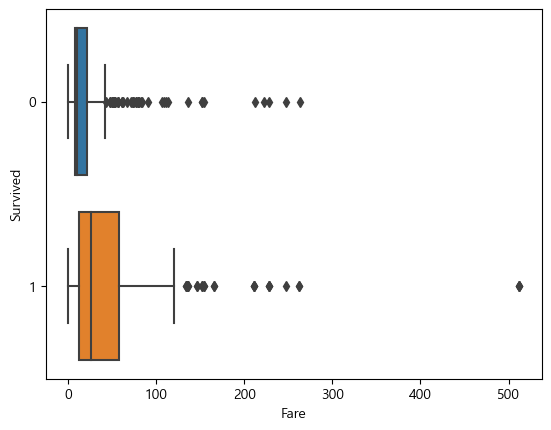

In [127]:
for item in df_ROS_list :
    sns.boxplot(data=df_ROS, x=item, y='Survived', orient='h')
    plt.show()

In [70]:
df_ROS['Fare'].describe()

count    843.000000
mean      31.004339
std       48.973300
min        0.000000
25%        7.895800
50%       13.000000
75%       29.700000
max      512.329200
Name: Fare, dtype: float64

In [71]:
Q1 = df_ROS['Fare'].describe()['25%']
Q3 = df_ROS['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1,Q3,IQR

(7.8958, 29.7, 21.804199999999998)

In [73]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(-24.810499999999998, 62.4063)

In [74]:
condition = (df_ROS['Fare'] <= bound_up) #긍정 조건 변환
condition

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 843, dtype: bool

In [67]:
df_ROS_filter = df_ROS[condition]

<Axes: xlabel='Survived', ylabel='Fare'>

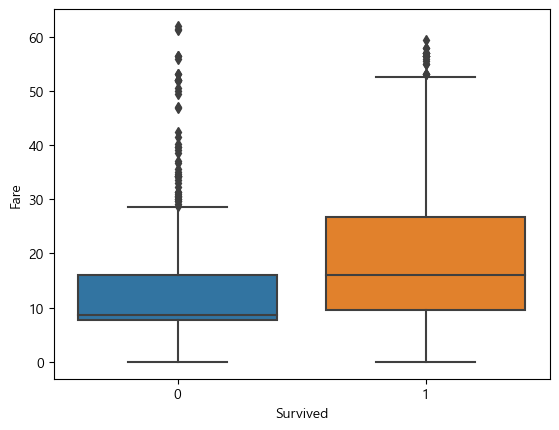

In [77]:
sns.boxplot(data=df_ROS_filter,x='Survived', y='Fare')

In [78]:
Q1 = df_ROS_filter['Fare'].describe()['25%']
Q3 = df_ROS_filter['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1,Q3,IQR

(7.885425, 25.671875, 17.786450000000002)

In [79]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(-18.794250000000005, 52.35155)

In [82]:
condition = (df_ROS_filter['Fare'] <= bound_up) #긍정 조건 변환
condition

0       True
2       True
3      False
4       True
5       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 736, dtype: bool

In [83]:
df_ROS_refilter = df_ROS_filter[condition]

<Axes: xlabel='Survived', ylabel='Fare'>

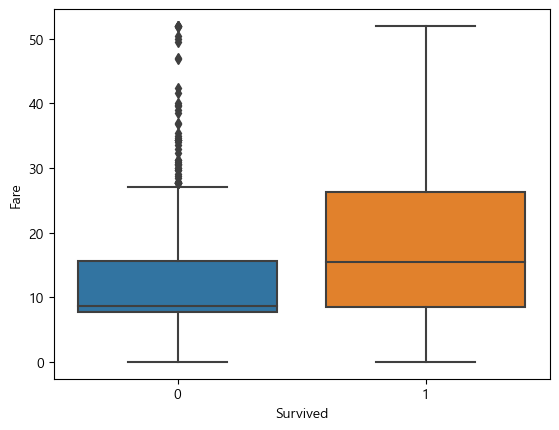

In [84]:
sns.boxplot(data = df_ROS_refilter ,x='Survived', y='Fare')

In [90]:
df_ROS_object_list = df_ROS.describe(include=object).drop(columns=['Survived','Name']).columns.to_list()
df_ROS_object_list

['Pclass', 'Sex', 'Ticket', 'Embarked']

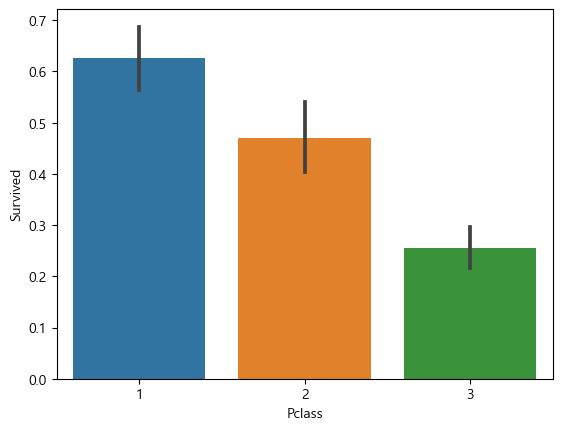

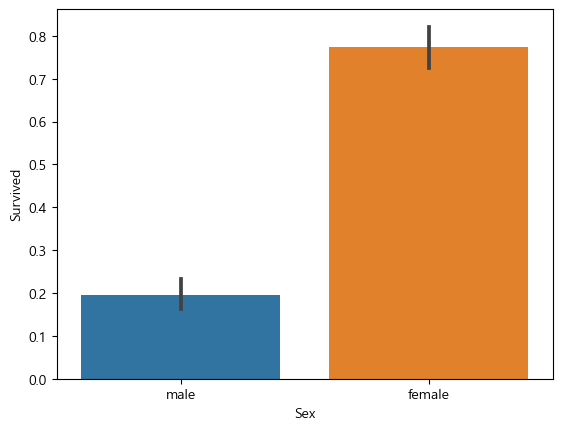

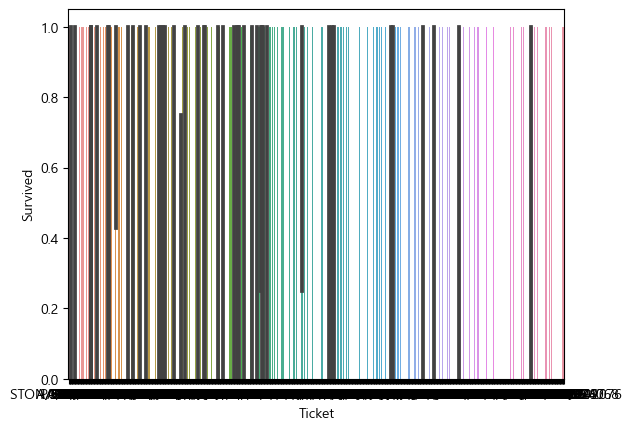

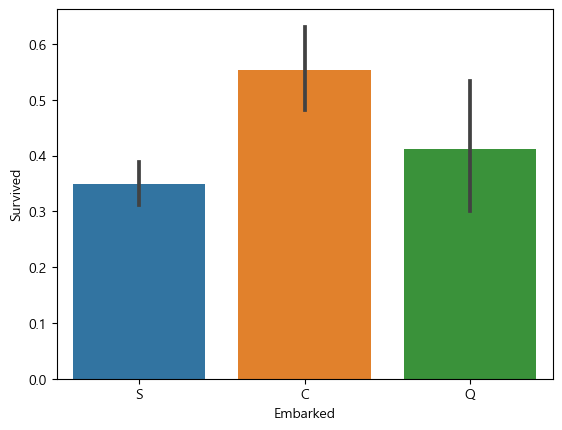

In [129]:
for item in df_ROS_object_list :
    sns.barplot(data = df_ROS ,x=item, y='Survived')
    plt.show()

In [125]:
df_ROS['Ticket'].describe()

count      843
unique     677
top       1601
freq         7
Name: Ticket, dtype: object

<Axes: xlabel='SibSp', ylabel='count'>

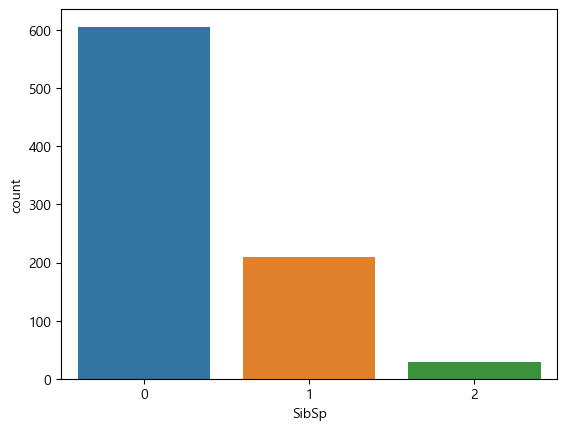

In [131]:
sns.countplot(data=df_ROS,x='SibSp')

In [132]:
df_ROS['SibSp'].value_counts()

0    606
1    209
2     28
Name: SibSp, dtype: int64